### Custom Indices

### This is for educational purposes and to support my medium article:

Build your own trading index with Python : https://medium.com/@phitzi/build-your-own-trading-index-with-python-483cea143bc2

In [1]:
import pandas as pd
import json
import yfinance as yf
import mplfinance as mpf

### Read the json file to get the list of currencies and their respective weights

In [2]:
# read the currency weights from the json file into a dictionary
with open('currencies_weights.json') as f:
    currencies = json.load(f)

currencies

{'USD': {'name': 'United States Dollar', 'symbol': '$', 'GDP': 26900.0},
 'EUR': {'name': 'Euro', 'symbol': 'â‚¬', 'GDP': 19795.0},
 'GBP': {'name': 'British Pound Sterling', 'symbol': 'Â£', 'GDP': 4032.0},
 'AUD': {'name': 'Australian Dollar', 'symbol': 'A$', 'GDP': 1072.5},
 'NZD': {'name': 'New Zealand Dollar', 'symbol': 'NZ$', 'GDP': 156.0},
 'CHF': {'name': 'Swiss Franc', 'symbol': 'CHF', 'GDP': 913.0},
 'CAD': {'name': 'Canadian Dollar', 'symbol': 'C$', 'GDP': 1702.0},
 'JPY': {'name': 'Japanese Yen', 'symbol': 'Â¥', 'GDP': 368.65},
 'SEK': {'name': 'Swedish Krona', 'symbol': 'kr', 'GDP': 58.9},
 'NOK': {'name': 'Norwegian Krone', 'symbol': 'kr', 'GDP': 39.48},
 'SGD': {'name': 'Singapore Dollar', 'symbol': 'S$', 'GDP': 370.0},
 'PLN': {'name': 'Polish Zloty', 'symbol': 'zÅ‚', 'GDP': 201.6},
 'DKK': {'name': 'Danish Krone', 'symbol': 'kr', 'GDP': 63.0},
 'TRY': {'name': 'Turkish Lira', 'symbol': 'â‚º', 'GDP': 37.8},
 'BRL': {'name': 'Brazilian Real', 'symbol': 'R$', 'GDP': 462.0}

### Read the json file to get the list of pairs to be used

In [3]:
# read the pairs document into a dictionary
with open('currencies_pairs.json') as f:
    pairs = json.load(f)

pairs

{'CHFPLN': {'name': 'CHFPLN', 'buycur': 'CHF', 'sellcur': 'PLN'},
 'EURGBP': {'name': 'EURGBP', 'buycur': 'EUR', 'sellcur': 'GBP'},
 'EURPLN': {'name': 'EURPLN', 'buycur': 'EUR', 'sellcur': 'PLN'},
 'GBPPLN': {'name': 'GBPPLN', 'buycur': 'GBP', 'sellcur': 'PLN'},
 'EURCHF': {'name': 'EURCHF', 'buycur': 'EUR', 'sellcur': 'CHF'},
 'GBPJPY': {'name': 'GBPJPY', 'buycur': 'GBP', 'sellcur': 'JPY'},
 'USDPLN': {'name': 'USDPLN', 'buycur': 'USD', 'sellcur': 'PLN'},
 'USDTRY': {'name': 'USDTRY', 'buycur': 'USD', 'sellcur': 'TRY'},
 'EURUSD': {'name': 'EURUSD', 'buycur': 'EUR', 'sellcur': 'USD'},
 'GBPUSD': {'name': 'GBPUSD', 'buycur': 'GBP', 'sellcur': 'USD'},
 'USDJPY': {'name': 'USDJPY', 'buycur': 'USD', 'sellcur': 'JPY'},
 'AUDCAD': {'name': 'AUDCAD', 'buycur': 'AUD', 'sellcur': 'CAD'},
 'AUDCHF': {'name': 'AUDCHF', 'buycur': 'AUD', 'sellcur': 'CHF'},
 'AUDJPY': {'name': 'AUDJPY', 'buycur': 'AUD', 'sellcur': 'JPY'},
 'GBPAUD': {'name': 'GBPAUD', 'buycur': 'GBP', 'sellcur': 'AUD'},
 'AUDNZD':

### Using YFinance download the 1h data for each pair

The dataframes will be stored in a initial dictionary of pairs

In [4]:
for pair in pairs:
    pairs[pair]['df'] = yf.download(pairs[pair]['name'] + '=X', start='2023-01-01',end='2023-12-31', interval='1h')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### It is important to have the same dates in all the dataframes so we will exclude not common dates

In [5]:
# find min and max
for pair in pairs:
    mindate = min(pairs[pair]['df'].index)
    maxdate = max(pairs[pair]['df'].index)
# exclude not common dates
for pair in pairs:
    pairs[pair]['df'] = pairs[pair]['df'].loc[mindate:maxdate]
print(mindate, maxdate)

2023-01-02 00:00:00+00:00 2023-12-29 21:00:00+00:00


### Create a dataframe with all the close prices currencies

- We set the currency for which we want to do the analysis
- We loop through all the pairs and store the close price of the currency in the dataframe
- We invert the rate for each pair when the currency is the sell currency so all of them have the currency as the buy currency

In [6]:
# the process will run for EURO
currency = 'USD'

mydict = {}
# filter the pairs that contain the currency
for pair in pairs:
    if currency in pairs[pair]['buycur']:
        print("buy", pair)
        mydict[pairs[pair]['sellcur']] = pairs[pair]['df']['Close']
    elif currency in pairs[pair]['sellcur']:
        print("sell", pair)
        mydict[pairs[pair]['buycur']] = 1 / pairs[pair]['df']['Close']
    
df_currency = pd.DataFrame(mydict)
df_currency
df_currency.to_csv('df_currencies.csv')

buy USDPLN
buy USDTRY
sell EURUSD
sell GBPUSD
buy USDJPY
sell NZDUSD
sell AUDUSD
buy USDCHF
buy USDCAD
buy USDHUF
buy USDNOK
buy USDSEK
buy USDZAR
buy USDDKK


### For the pairs we calculate the weights based on the GDP

The order should be the same as the dataframe

In [7]:
weights = []
for col in df_currency.columns:
    weights.append(currencies[col]['GDP'])

print(weights)
weights = [weight / sum(weights) for weight in weights]
print(weights)

[201.6, 37.8, 19795.0, 4032.0, 368.65, 156.0, 1072.5, 913.0, 1702.0, 0.58, 39.48, 58.9, 22.79, 63.0]
[0.007082804875049624, 0.0013280259140718044, 0.6954569568532109, 0.14165609750099248, 0.012951765958269065, 0.005480741867597923, 0.03768010033973572, 0.03207639310972374, 0.05979629909392093, 2.037711720004356e-05, 0.0013870492880305512, 0.0020693313846251132, 0.000800680174118953, 0.0022133765234530075]


### We calculate the index

- First we calculate the percentage change
- The we apply the USD column to the weighted percentage change (dot)
- Then we calculate the cumulative sum for the row (cumsum)

In [8]:
  
df_index = df_currency.copy()
df_index = df_index.pct_change(fill_method=None)
df_index.dropna(inplace=True)

weights_df = pd.DataFrame(weights, index=df_index.columns, columns=['Weight'])
df_index[currency] = df_index.dot(weights_df['Weight']).cumsum(axis=0)*1000
df_index[currency] = df_index[currency].round(6)
print(df_index.head(5))


                                PLN       TRY       EUR       GBP       JPY  \
Datetime                                                                      
2023-01-02 09:00:00+00:00  0.000846 -0.000523  0.000107  0.000759 -0.000451   
2023-01-02 10:00:00+00:00 -0.001085  0.000048 -0.000214 -0.000434 -0.000734   
2023-01-02 11:00:00+00:00  0.001006  0.000278 -0.000427  0.000048 -0.000138   
2023-01-02 12:00:00+00:00  0.000228 -0.000224  0.000428 -0.000096 -0.000268   
2023-01-02 13:00:00+00:00 -0.000043  0.000040  0.000107  0.000181 -0.000666   

                                NZD       AUD       CHF       CAD       HUF  \
Datetime                                                                      
2023-01-02 09:00:00+00:00  0.000063  0.001423 -0.000335  0.001085 -0.001624   
2023-01-02 10:00:00+00:00 -0.000190 -0.000027 -0.000011  0.000184  0.000187   
2023-01-02 11:00:00+00:00 -0.000253 -0.001482 -0.000238  0.000656 -0.000213   
2023-01-02 12:00:00+00:00  0.000063 -0.000368 -0.00

### Calculate the candles for the index

With the use of resample we can calculate the daily OHLC for the index

In [9]:
df_index = df_index[currency].dropna()
ohlc = df_index.resample('D').ohlc()
ohlc.dropna(inplace=True)
ohlc

,open,high,low,close
Datetime,,,,
2023-01-02 00:00:00+00:00,0.284249,1.936354,-0.250415,0.836444
2023-01-03 00:00:00+00:00,1.437141,14.063053,0.595105,12.326182
2023-01-04 00:00:00+00:00,10.937866,10.937866,3.993569,5.507301
2023-01-05 00:00:00+00:00,3.763795,15.212189,3.763795,14.312405
2023-01-06 00:00:00+00:00,13.483515,17.597058,1.976376,2.222598
...,...,...,...,...
2023-12-22 00:00:00+00:00,-10.782935,-10.037599,-13.887744,-11.446762
2023-12-26 00:00:00+00:00,-11.726917,-10.799179,-13.697165,-13.632153
2023-12-27 00:00:00+00:00,-13.120728,-12.952654,-19.443416,-19.056811


### Validation

To ensure that our code is correct we will download the USD dollar index and compare

In [12]:
usd_dollar_index = yf.download('DX-Y.NYB', start='2023-01-01',end='2023-12-31', interval='1d')
usd_dollar_index

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,103.660004,104.860001,103.470001,104.519997,104.519997,0
2023-01-04,104.580002,104.599998,103.830002,104.250000,104.250000,0
2023-01-05,104.070000,105.269997,103.989998,105.040001,105.040001,0
2023-01-06,105.050003,105.629997,103.870003,103.879997,103.879997,0
2023-01-09,103.910004,103.940002,102.940002,103.000000,103.000000,0
...,...,...,...,...,...,...
2023-12-22,101.760002,101.900002,101.430000,101.699997,101.699997,0
2023-12-26,101.650002,101.769997,101.449997,101.470001,101.470001,0
2023-12-27,101.550003,101.570000,100.830002,100.989998,100.989998,0


### Visual comparison

We will plot the USD and our custom Index

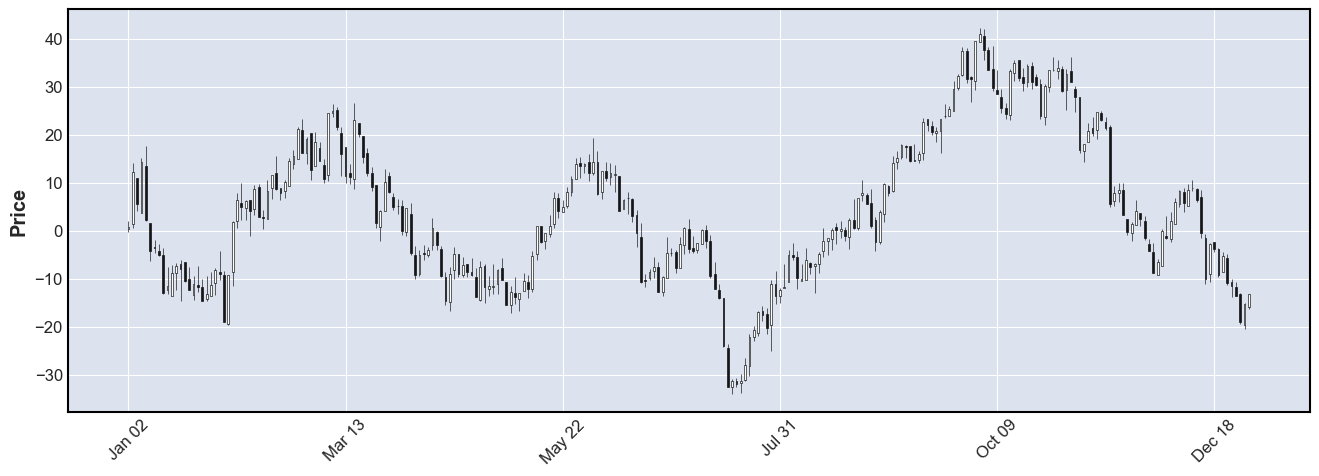

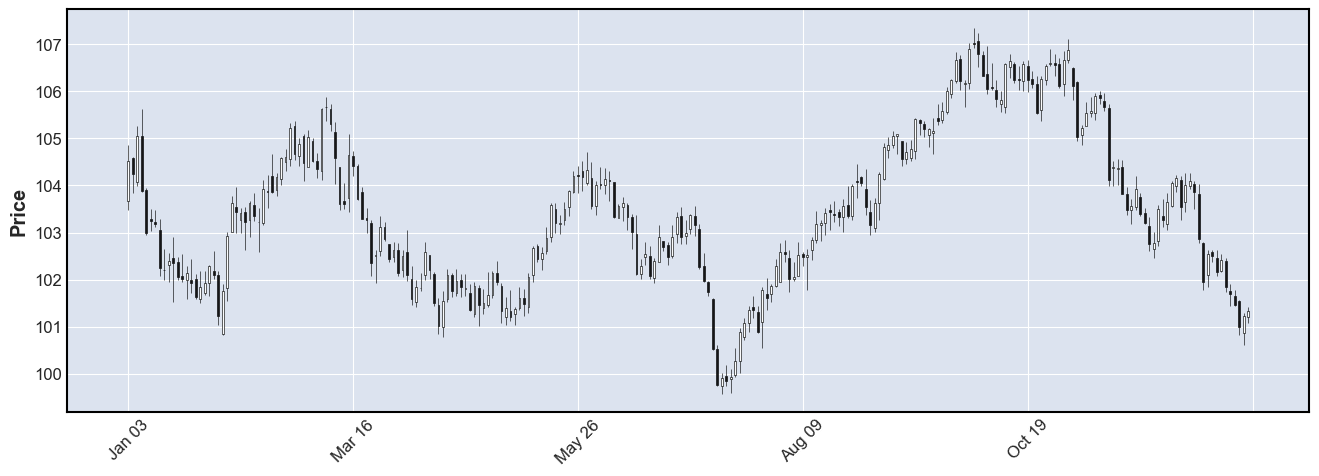

In [15]:
mpf.plot(ohlc,type='candle',figratio=(30,10))
mpf.plot(usd_dollar_index,type='candle',figratio=(30,10))

### Comparison with Correlation

We will calculate the correlation between the USD and the index closing prices

In [29]:
# first we shold make both datetime indices timezone-naive before calculating the correlation
ohlc.index = ohlc.index.tz_localize(None)
usd_dollar_index.index = usd_dollar_index.index.tz_localize(None)

combined_df = pd.DataFrame({
    'ohlc': ohlc['close'],
    'usd_dollar_index': usd_dollar_index['Close']
})

correlation = combined_df.corr().iloc[0, 1]
correlation


np.float64(0.9763150039661698)